# Classification: Cross validation + PR + ROC-AUC

## 1. prepeare data

In [2]:
from sklearn.datasets import fetch_openml

In [4]:
mnist = fetch_openml('mnist_784')

In [5]:
import pickle

In [6]:
pickle.dump(mnist,open('mnist.plk','bw'))

In [11]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [12]:
y.shape

(70000,)

In [135]:
X_train, X_test, y_train, y_test = X[:10000], X[10000:20000], y[:10000], y[10000:20000]

In [14]:
import numpy as np

In [136]:
shuffle_index = np.random.permutation(10000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [42]:
y_train_5 = (y_train == '5') # True for all 5s, False for all other digits.
y_test_5 = (y_test == '5')

## 2. train model

In [16]:
from sklearn.linear_model import SGDClassifier

In [43]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [46]:
sgd_clf.predict([X_train[2]])

array([False])

## 3. cross validation

In [134]:
from sklearn.model_selection import cross_val_score

In [53]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3,scoring='accuracy')

array([0.96190762, 0.96340732, 0.9714886 ])

## 4. Confusion Matrix, precision and recall

In [51]:
from sklearn.model_selection import cross_val_predict

In [47]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [54]:
y_train_pred

array([False, False, False, ..., False, False, False])

In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
confusion_matrix(y_train_5, y_train_pred)

array([[9034,  103],
       [ 241,  622]], dtype=int64)

In [60]:
from sklearn.metrics import precision_score, recall_score

In [61]:
precision_score(y_train_5, y_train_pred) # == 622/(622+103)

0.8579310344827586

In [62]:
recall_score(y_train_5, y_train_pred) # == 622 / (622 + 241)

0.7207415990730012

In [65]:
from sklearn.metrics import f1_score

In [66]:
f1_score(y_train_5, y_train_pred)

0.783375314861461

## 5. precision and recall curve

In [68]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,method="decision_function")

In [71]:
y_scores

array([-467940.60966683, -140731.51140239, -165299.47896068, ...,
       -361622.03024908, -361990.08525222, -230637.4203356 ])

In [72]:
from sklearn.metrics import precision_recall_curve

In [73]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [79]:
print(recalls.size,precisions.size,thresholds.size)

9478 9478 9477


In [80]:
import matplotlib.pyplot as plt

In [81]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

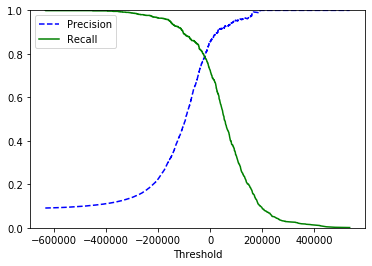

In [82]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

Text(0, 0.5, 'precisions')

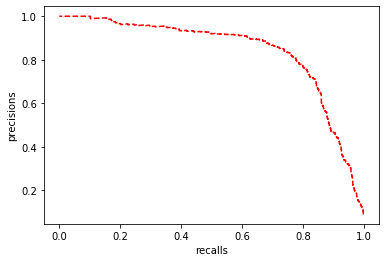

In [118]:
ax = plt.subplot(111)
plt.plot(recalls,precisions,'r--')
ax.set_xlabel('recalls')
ax.set_ylabel('precisions')

## 6. ROC AUC

In [119]:
from sklearn.metrics import roc_curve

In [164]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Text(0, 0.5, 'True positive rate')

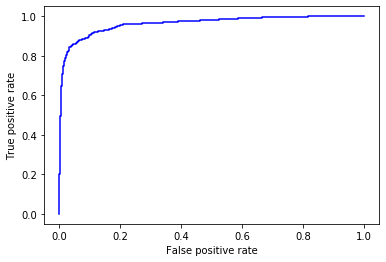

In [125]:
ax1 = plt.subplot(111)
plt.plot(fpr,tpr,'b')
ax1.set_xlabel('False positive rate')
ax1.set_ylabel('True positive rate')

In [126]:
from sklearn.metrics import roc_auc_score

In [127]:
roc_auc_score(y_train_5, y_scores)

0.9629971525247645

## 7.compare roc curves between randomforest and SGD

In [128]:
from sklearn.ensemble import RandomForestClassifier

In [129]:
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
method="predict_proba")

C:\ProgramData\Anaconda3\envs\python3.6\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\envs\python3.6\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\envs\python3.6\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [197]:
y_probas_forest[8] # Sequence: Negative Positive

array([0.1, 0.9])

In [154]:
y_scores_forest = y_probas_forest[:, 1]

In [162]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

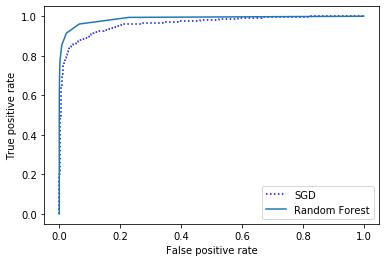

In [176]:
ax2 = plt.subplot(111)
plt.plot(fpr, tpr, "b:", label="SGD")
plt.plot(fpr_forest, tpr_forest, label="Random Forest")
plt.legend()
ax2.set_xlabel('False positive rate')
ax2.set_ylabel('True positive rate')
plt.show()

## 8. Multiclass Classification

### default binary classifier use OVA for multi-class classification task

In [177]:
sgd_clf.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [179]:
score =sgd_clf.decision_function([X_train[0]])
score

array([[-494244.54319911, -330399.20677685, -283201.29833046,
        -156748.85739293,   99298.12254929,  -94804.33325664,
        -266801.44715776,  -87273.35059185,  -24851.29703684,
         -85618.49796166]])

In [181]:
np.argmax(score) # predicted number

4

### force ScikitLearn to use one-versus-one or one-versus-all

In [182]:
from sklearn.multiclass import OneVsOneClassifier

In [183]:
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))

In [184]:
ovo_clf.fit(X_train, y_train)

OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False,
                                           class_weight=None,
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal',
                                           loss='hinge', max_iter=1000,
                                           n_iter_no_change=5, n_jobs=None,
                                           penalty='l2', power_t=0.5,
                                           random_state=42, shuffle=True,
                                           tol=0.001, validation_fraction=0.1,
                                           verbose=0, warm_start=False),
                   n_jobs=None)

In [185]:
ovo_clf.predict([X_train[3]])

array(['9'], dtype=object)

In [187]:
len(ovo_clf.estimators_) # 10 digits has 10*(10-1)/2 OVO conbination

45

###  Random Forest (multi_class classifier) can handle muti-class classification task directly

In [188]:
forest_clf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\envs\python3.6\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [189]:
forest_clf.predict([X_train[20]])

array(['8'], dtype=object)

In [190]:
forest_clf.predict_proba([X_train[20]])

array([[0.1, 0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0.7, 0.1]])

## 9. scaling the inputs

In [192]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87290168, 0.87346327, 0.8702313 ])

In [233]:
scaler1 = StandardScaler()
a = np.arange(-19,21).reshape(4,10)
b=scaler1.fit_transform(a)
print(b.mean(),b.var())

-1.1102230246251566e-17 1.0


In [193]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

C:\ProgramData\Anaconda3\envs\python3.6\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.89568345, 0.90254873, 0.90057074])

## 10. Error Analysis

In [270]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

C:\ProgramData\Anaconda3\envs\python3.6\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [271]:
conf_mx = confusion_matrix(y_train, y_train_pred)

In [286]:
conf_mx

array([[ 966,    0,    6,    4,    2,    8,    8,    1,    6,    0],
       [   0, 1067,   12,    2,    1,   12,    0,    1,   29,    3],
       [   6,   11,  864,   22,   12,    6,   15,    9,   43,    3],
       [   4,    9,   30,  889,    0,   48,    5,   11,   19,   17],
       [   2,    4,   13,    3,  891,    6,   11,    5,   19,   26],
       [   9,    5,    5,   38,   16,  709,   17,    1,   50,   13],
       [   5,    4,   11,    0,    8,   14,  955,    2,   15,    0],
       [   6,    3,   12,    9,   12,    0,    1,  965,    5,   57],
       [   8,   14,   17,   20,    2,   23,   14,    4,  832,   10],
       [   9,    3,    9,   20,   29,    3,    0,   34,   13,  858]],
      dtype=int64)

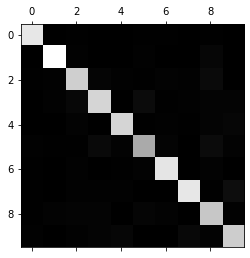

In [276]:
plt.matshow(conf_mx,cmap=plt.cm.gray)

In [282]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

In [283]:
norm_conf_mx

array([[9.65034965e-01, 0.00000000e+00, 5.99400599e-03, 3.99600400e-03,
        1.99800200e-03, 7.99200799e-03, 7.99200799e-03, 9.99000999e-04,
        5.99400599e-03, 0.00000000e+00],
       [0.00000000e+00, 9.46761313e-01, 1.06477374e-02, 1.77462289e-03,
        8.87311446e-04, 1.06477374e-02, 0.00000000e+00, 8.87311446e-04,
        2.57320319e-02, 2.66193434e-03],
       [6.05449041e-03, 1.10998991e-02, 8.71846620e-01, 2.21997982e-02,
        1.21089808e-02, 6.05449041e-03, 1.51362260e-02, 9.08173562e-03,
        4.33905146e-02, 3.02724521e-03],
       [3.87596899e-03, 8.72093023e-03, 2.90697674e-02, 8.61434109e-01,
        0.00000000e+00, 4.65116279e-02, 4.84496124e-03, 1.06589147e-02,
        1.84108527e-02, 1.64728682e-02],
       [2.04081633e-03, 4.08163265e-03, 1.32653061e-02, 3.06122449e-03,
        9.09183673e-01, 6.12244898e-03, 1.12244898e-02, 5.10204082e-03,
        1.93877551e-02, 2.65306122e-02],
       [1.04287370e-02, 5.79374276e-03, 5.79374276e-03, 4.40324450e-02,
   

In [291]:
np.fill_diagonal(norm_conf_mx,0)

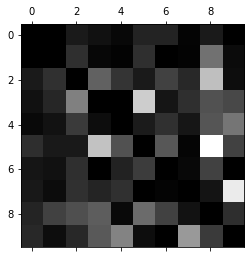

In [292]:
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)

In [306]:
cl_a, cl_b = '3', '5'
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

In [317]:
import matplotlib

In [318]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

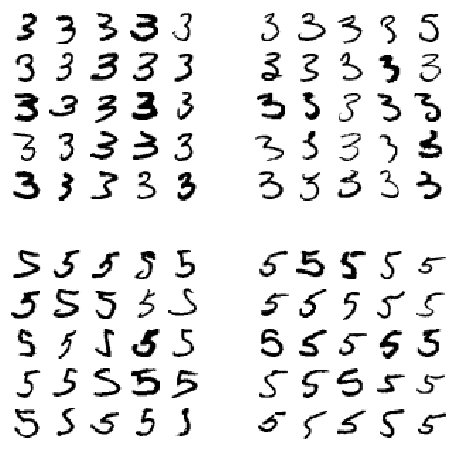

In [319]:
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)

## 11.multilable classification

In [342]:
from sklearn.neighbors import KNeighborsClassifier

In [333]:
y_train_int = np.array(list(map(int, y_train)))

In [339]:
y_train_large = (y_train_int >= 7)
y_train_odd = (y_train_int % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [343]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [352]:
knn_clf.predict(X_train[0:4])

array([[False, False],
       [False,  True],
       [False,  True],
       [ True,  True]])

In [351]:
y_train[0:4]

array(['4', '1', '3', '9'], dtype=object)

In [354]:
from sklearn.metrics import f1_score

In [355]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)

In [356]:
f1_score(y_train, y_train_knn_pred, average="macro")

0.94105444048739

In [357]:
f1_score(y_train, y_train_knn_pred, average="weighted")

0.9415025610484922

## 12. Multioutput Classification

In [359]:
noise = np.random.randint(0, 100, (len(X_train), 784))
noise = np.random.randint(0, 100, (len(X_test), 784))
X_train_mod = X_train + noise
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

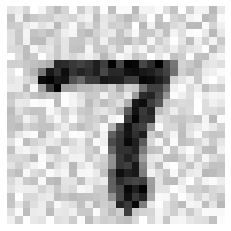

In [365]:
plot_digits([X_test_mod[2]])

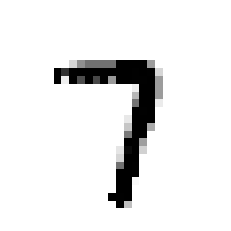

In [363]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[2]])
plot_digits(clean_digit)